# Assignment 2: s3944721 and s3941488

Authors: Issac Zerihun and Samuel Chan

In [ ]:
from google.colab import drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/drive')
!cp "/content/drive/My Drive/A2/UCI_data.csv" .

Mounted at /content/drive


In [ ]:
file = 'UCI_data.csv'
df = pd.read_csv(file, on_bad_lines='skip')

In [ ]:
df.dtypes

date              object
T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
RH_5             float64
T6               float64
RH_6             float64
T7               float64
RH_7             float64
T8               float64
RH_8             float64
T9               float64
RH_9             float64
T_out            float64
Press_mm_hg      float64
RH_out           float64
Windspeed        float64
Visibility       float64
Tdewpoint        float64
rv1              float64
rv2              float64
TARGET_energy      int64
dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df.set_index('date', inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df, test_size=0.2, shuffle=False)

In [ ]:
df.head()

T1       RH_1    T2       RH_2     T3       RH_3  \
date                                                                       
2016-01-11 17:00:00  19.89  47.596667  19.2  44.790000  19.79  44.730000   
2016-01-11 17:10:00  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2016-01-11 17:20:00  19.89  46.300000  19.2  44.626667  19.79  44.933333   
2016-01-11 17:30:00  19.89  46.066667  19.2  44.590000  19.79  45.000000   
2016-01-11 17:40:00  19.89  46.333333  19.2  44.530000  19.79  45.000000   

                            T4       RH_4         T5   RH_5  ...   RH_9  \
date                                                         ...          
2016-01-11 17:00:00  19.000000  45.566667  17.166667  55.20  ...  45.53   
2016-01-11 17:10:00  19.000000  45.992500  17.166667  55.20  ...  45.56   
2016-01-11 17:20:00  18.926667  45.890000  17.166667  55.09  ...  45.50   
2016-01-11 17:30:00  18.890000  45.723333  17.166667  55.09  ...  45.40   
2016-01-11 17:40:00  18.890000  45.530000  17.200000  55.09  ...  45.40   

                        T_out  Press_mm_hg  RH_out  Windspeed  Visibility  \
date                                                                        
2016-01-11 17:00:00  6.600000        733.5    92.0   7.000000   63.000000   
2016-01-11 17:10:00  6.483333        733.6    92.0   6.666667   59.166667   
2016-01-11 17:20:00  6.366667        733.7    92.0   6.333333   55.333333   
2016-01-11 17:30:00  6.250000        733.8    92.0   6.000000   51.500000   
2016-01-11 17:40:00  6.133333        733.9    92.0   5.666667   47.666667   

                     Tdewpoint        rv1        rv2  TARGET_energy  
date                                                                 
2016-01-11 17:00:00        5.3  13.275433  13.275433             90  
2016-01-11 17:10:00        5.2  18.606195  18.606195             90  
2016-01-11 17:20:00        5.1  28.642668  28.642668             80  
2016-01-11 17:30:00        5.0  45.410389  45.410389             90  
2016-01-11 17:40:00        4.9  10.084097  10.084097            100  

[5 rows x 27 columns]

#### Boxplots

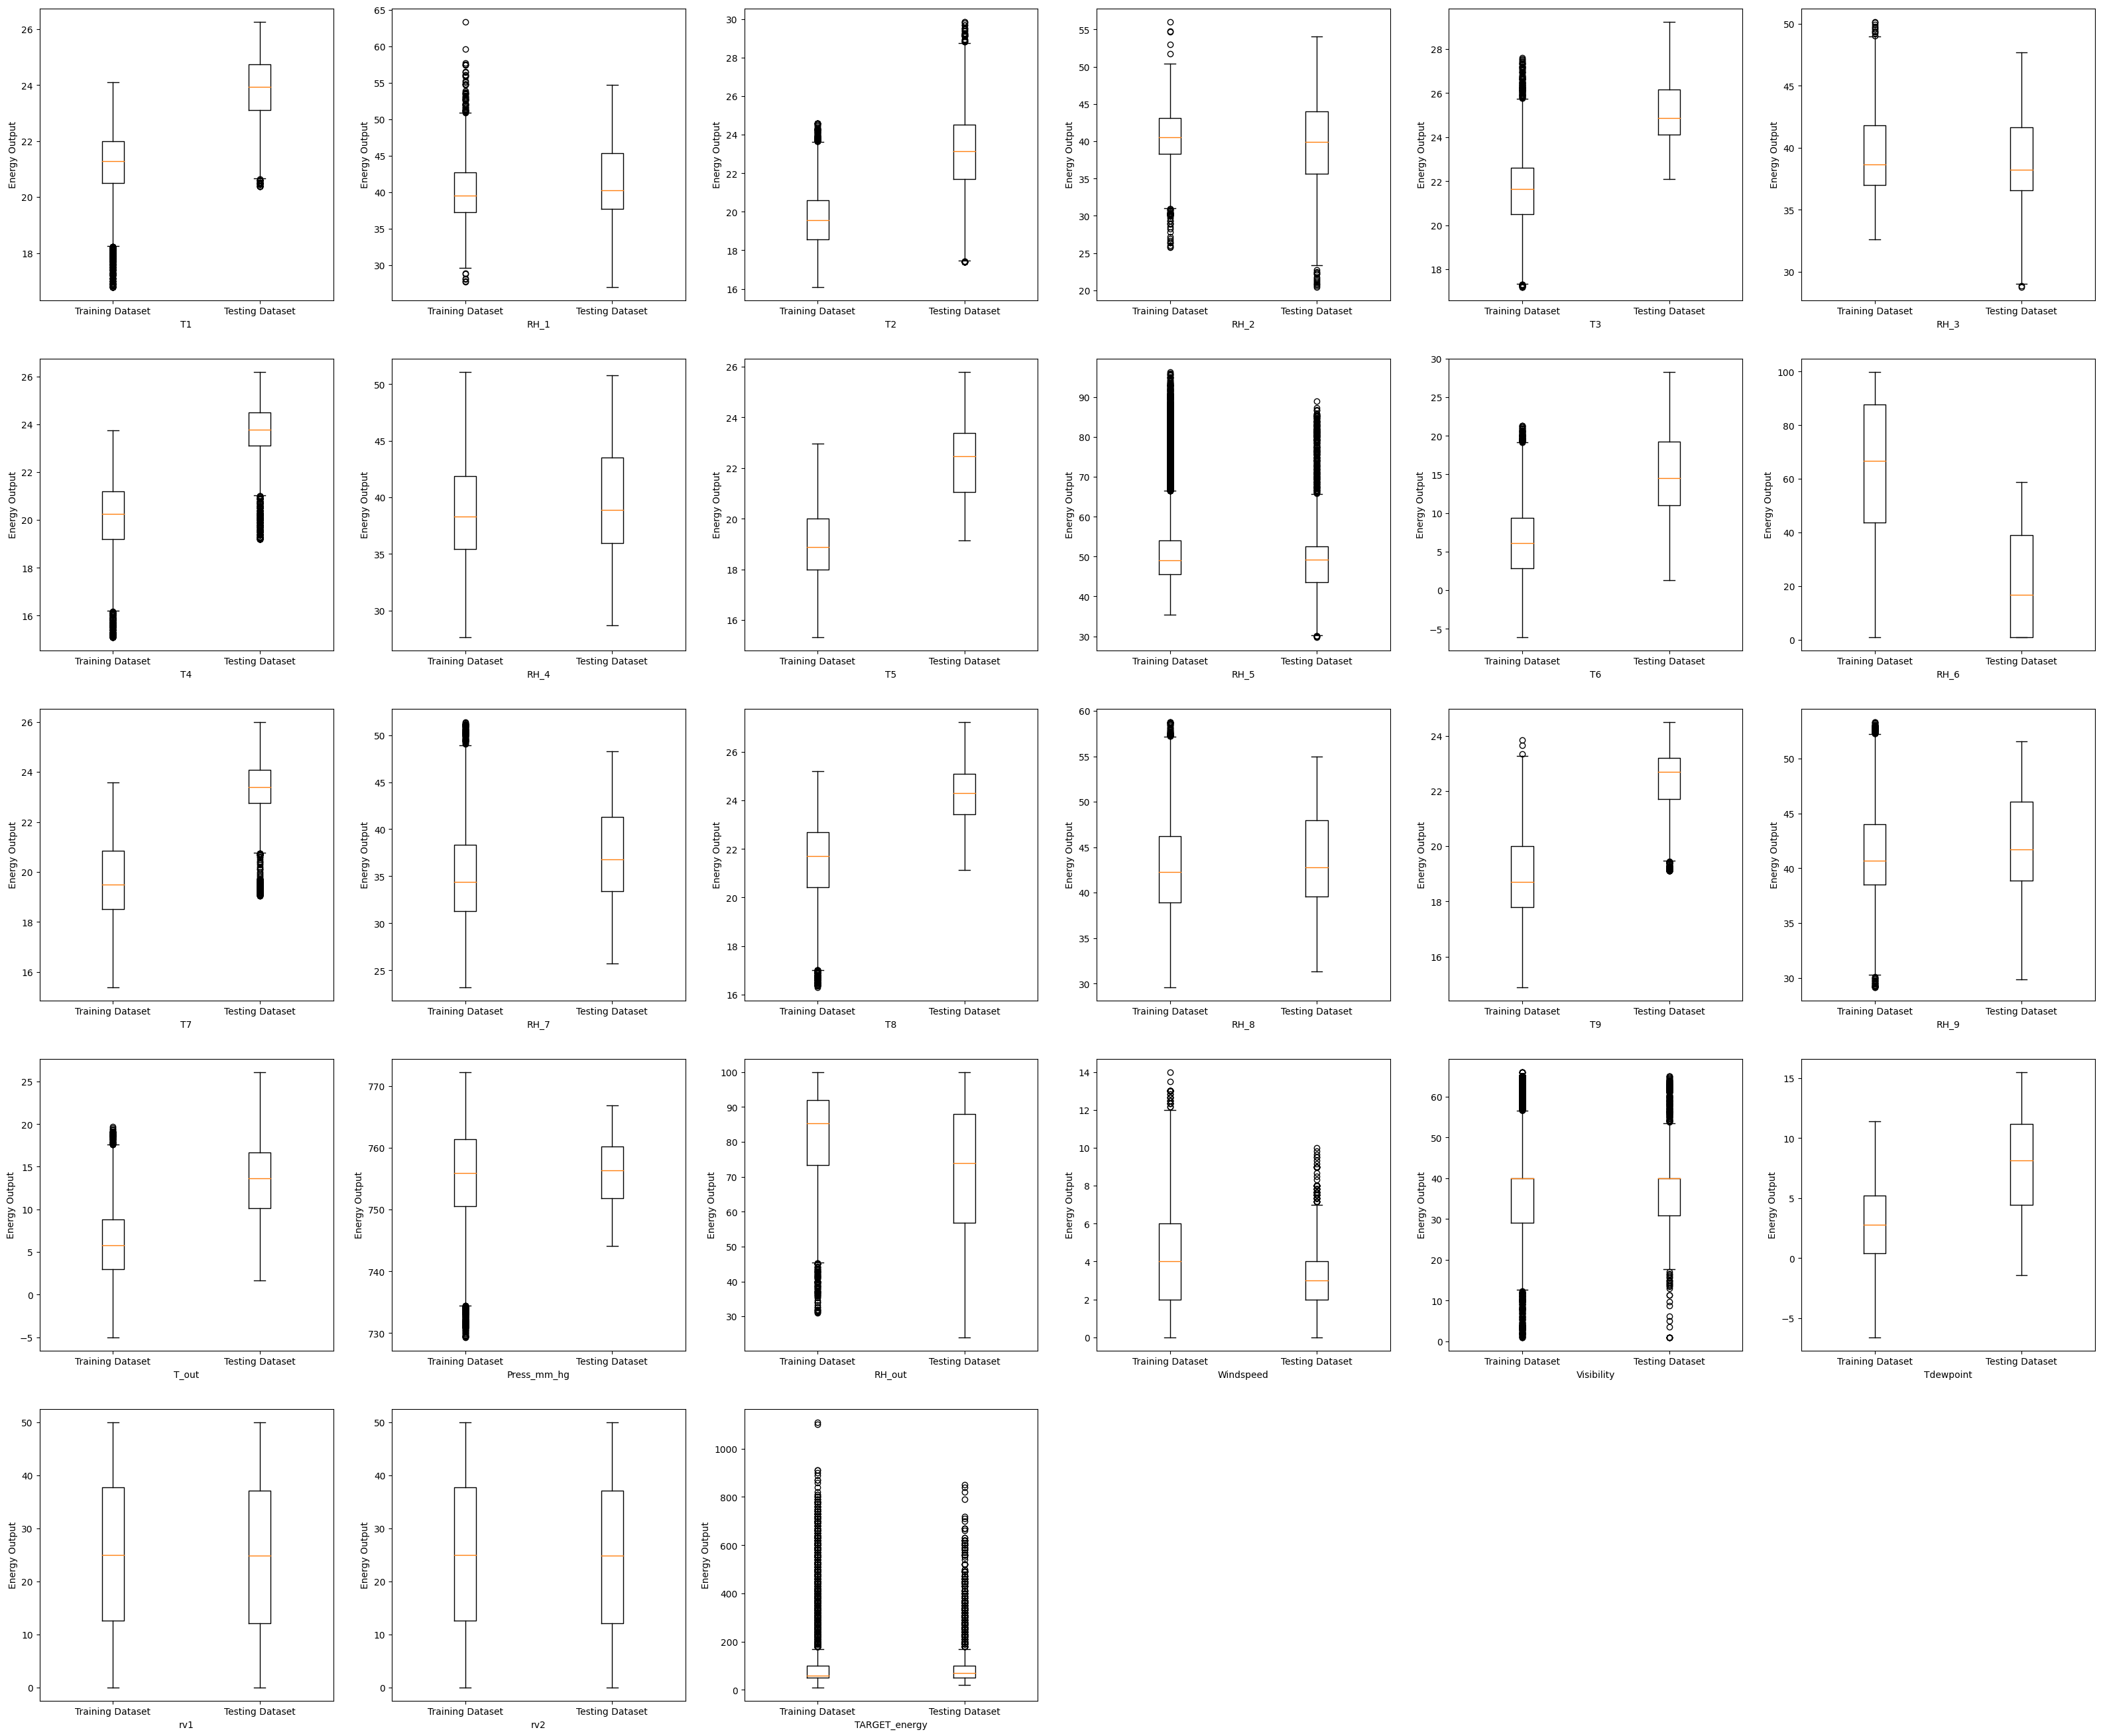

In [ ]:
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns):
    plt.subplot(6,6,i+1)
    plt.boxplot(training_data[col], positions = [0])
    plt.boxplot(testing_data[col], positions = [1])
    plt.xticks([0,1],['Training Dataset', 'Testing Dataset'])
    plt.xlabel(col)
    plt.ylabel('Energy Output')
plt.show()

#### Removal of outliers (training dataset)

In [ ]:
for i, col in enumerate(df.columns):

    q1 = training_data[col].quantile(0.25)
    q3 = training_data[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    training_data = training_data[(training_data[col] < upper_bound) & (training_data[col] > lower_bound)]

#### Removal of outliers (testing dataset)

In [ ]:
for i, col in enumerate(df.columns):

    q1 = testing_data[col].quantile(0.25)
    q3 = testing_data[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    testing_data = testing_data[(testing_data[col] < upper_bound) & (testing_data[col] > lower_bound)]

#### Checking to see if outliers have been removed.

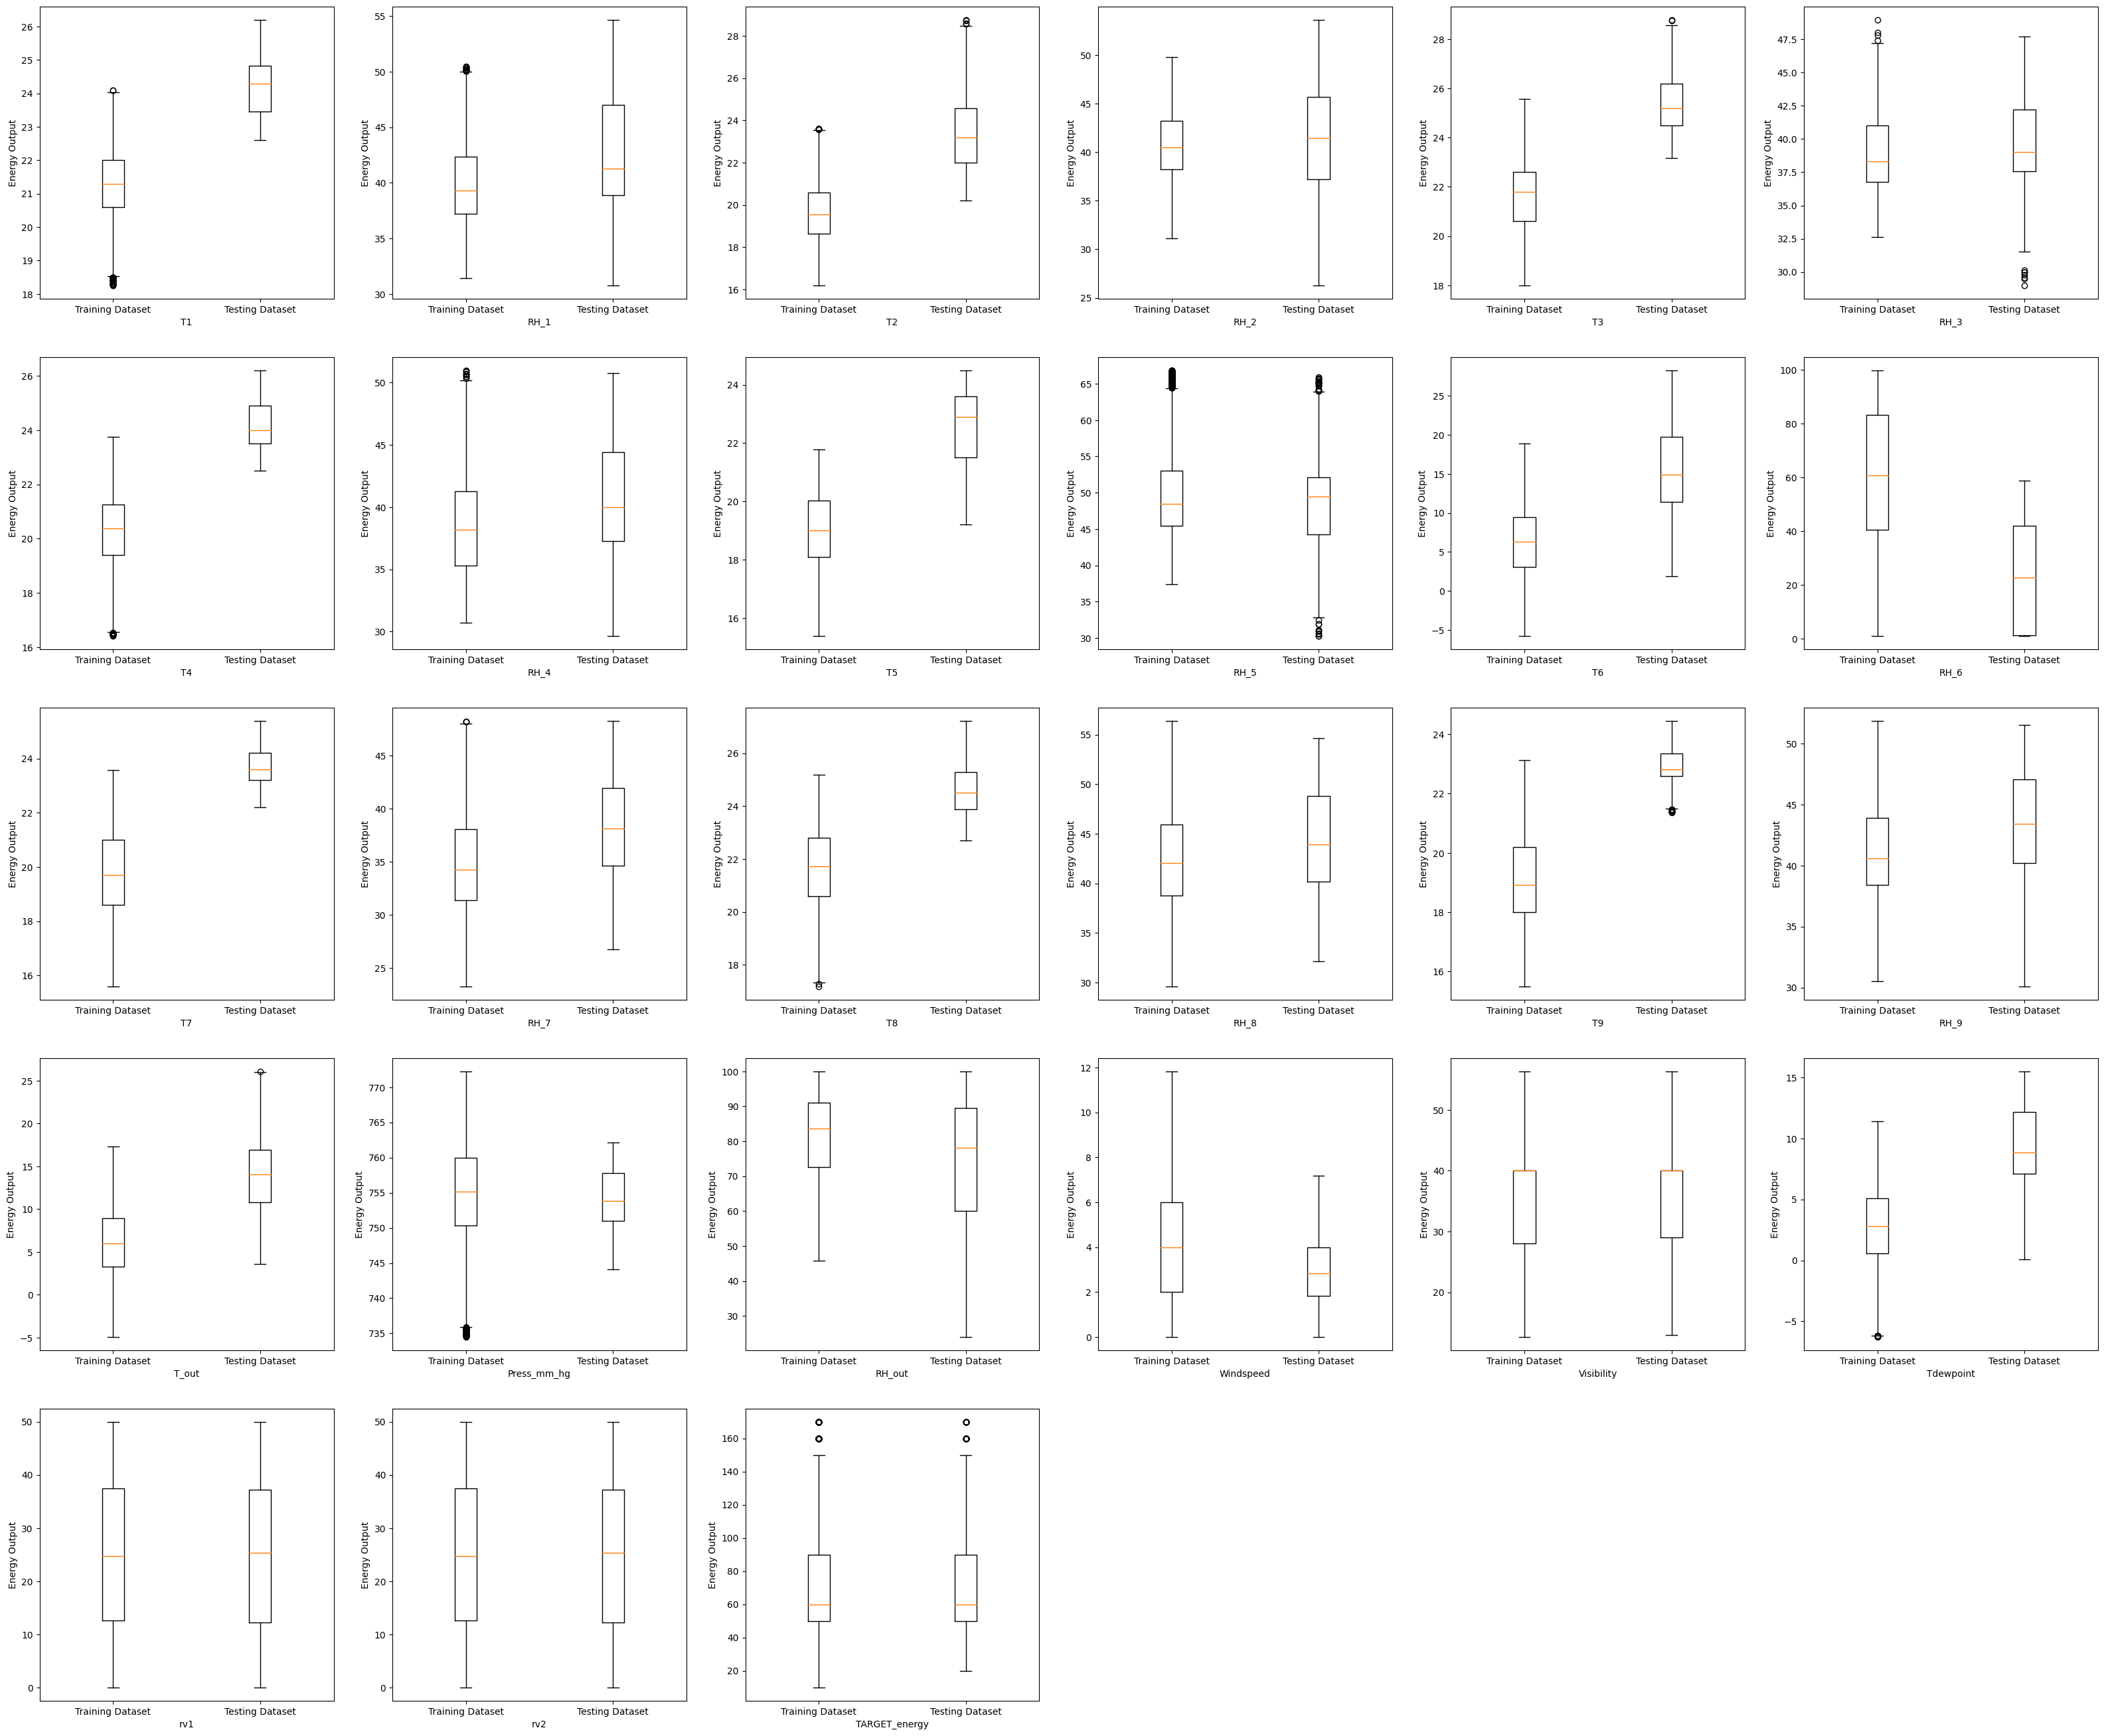

In [ ]:
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns):
    plt.subplot(6,6,i+1)
    plt.boxplot(training_data[col], positions = [0])
    plt.boxplot(testing_data[col], positions = [1])
    plt.xticks([0,1],['Training Dataset', 'Testing Dataset'])
    plt.xlabel(col)
    plt.ylabel('Energy Output')
plt.show()

#### Checking for duplicates

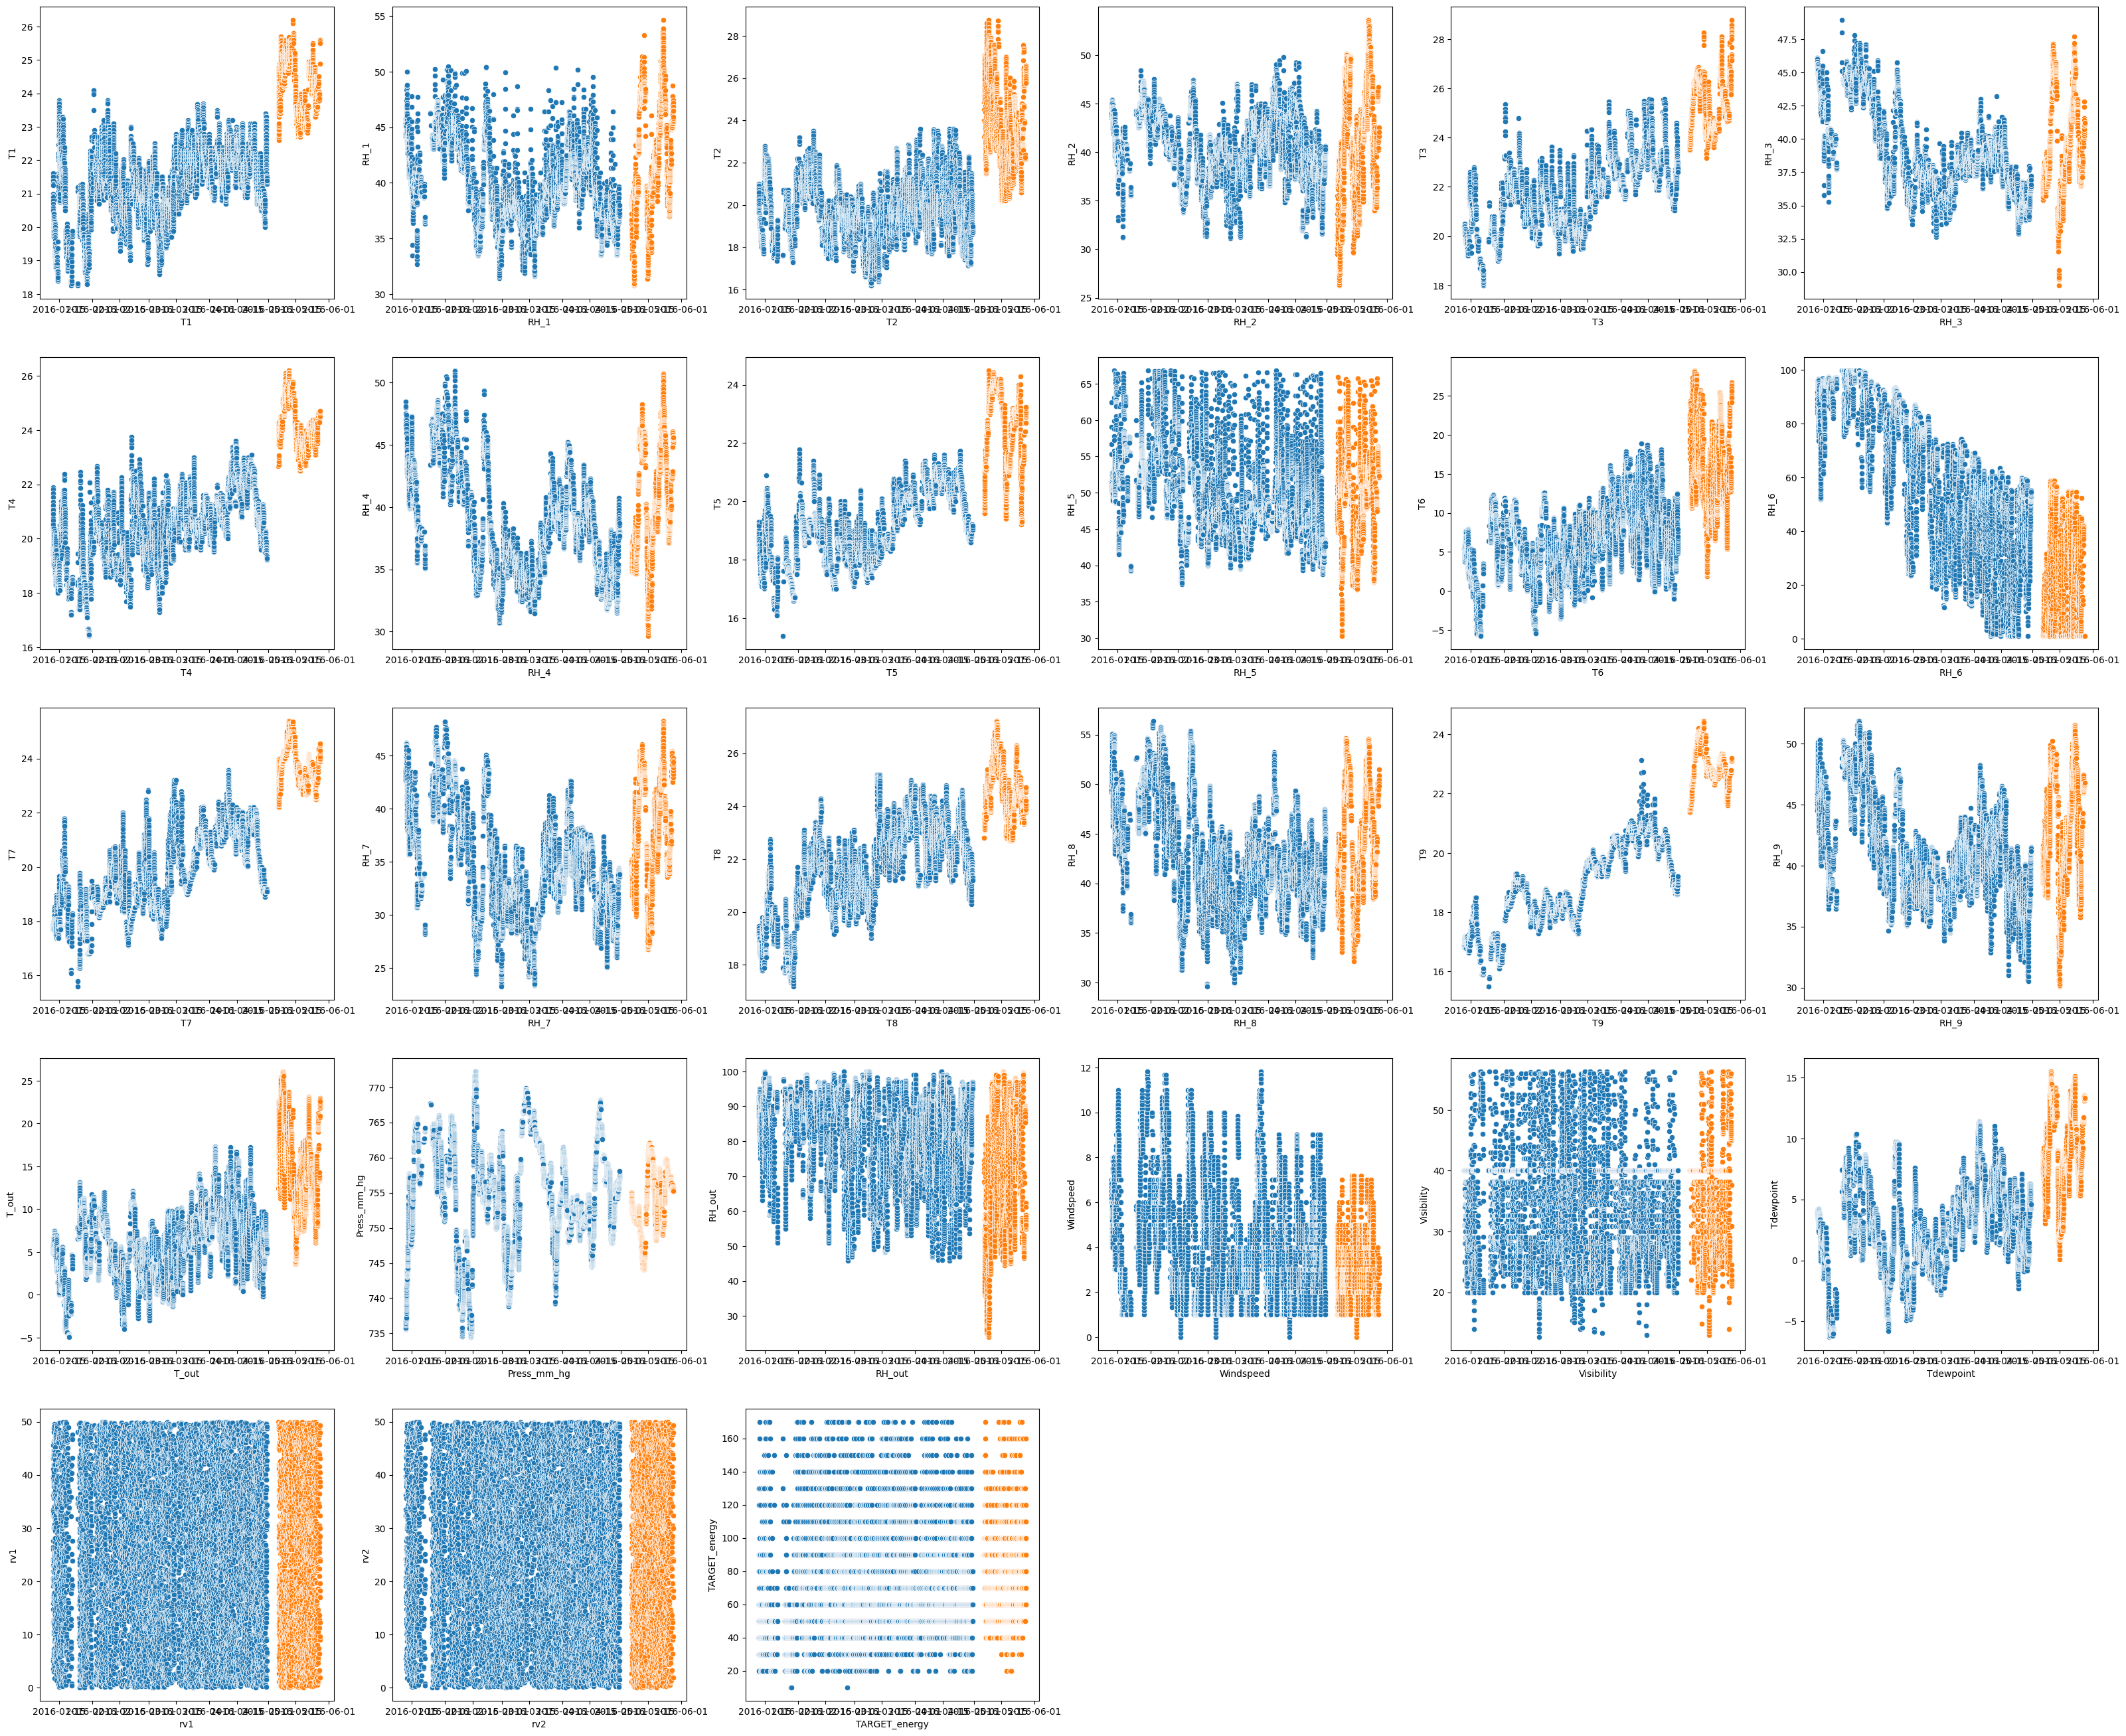

In [ ]:
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns):
    plt.subplot(6,6,i+1)
    sns.scatterplot(data = training_data, x = training_data.index, y = training_data[col])
    sns.scatterplot(data = testing_data, x = testing_data.index, y = testing_data[col])
    plt.xlabel(col)
plt.show()

#### Feature Engineering(Part 2B: Refinements)

In [ ]:
#training
# time-based features
training_data['hour'] = training_data.index.hour
training_data['day_of_week'] = training_data.index.dayofweek
training_data['month'] = training_data.index.month
training_data['is_weekend'] = training_data['day_of_week'].apply(lambda x: 1 if x > 4 else 0)

# lag features
columns = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
for column in columns:
    lagged_column_name = f'{column}_lag'
    training_data[lagged_column_name] = training_data[column].shift(1)

columns = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']
for column in columns:
    lagged_column_name = f'{column}_lag'
    training_data[lagged_column_name] = training_data[column].shift(1)

# rolling features
columns = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
for column in columns:
    rolling_mean_column_name = f'{column}_rolling_mean'
    training_data[rolling_mean_column_name] = training_data[column].rolling(window=3).mean()

columns = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']
for column in columns:
    rolling_mean_column_name = f'{column}_rolling_mean'
    training_data[rolling_mean_column_name] = training_data[column].rolling(window=3).mean()

# interaction features
columns_T = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
columns_RH = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']

for T, RH in zip(columns_T, columns_RH):
    interaction_column_name = f'{T}_{RH}_interaction'
    training_data[interaction_column_name] = training_data[T] * training_data[RH]

#testing
# time-based features
testing_data['hour'] = testing_data.index.hour
testing_data['day_of_week'] = testing_data.index.dayofweek
testing_data['month'] = testing_data.index.month
testing_data['is_weekend'] = testing_data['day_of_week'].apply(lambda x: 1 if x > 4 else 0)

# lag features
columns = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
for column in columns:
    lagged_column_name = f'{column}_lag'
    testing_data[lagged_column_name] = testing_data[column].shift(1)

columns = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']
for column in columns:
    lagged_column_name = f'{column}_lag'
    testing_data[lagged_column_name] = testing_data[column].shift(1)

# rolling features
columns = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
for column in columns:
    rolling_mean_column_name = f'{column}_rolling_mean'
    testing_data[rolling_mean_column_name] = testing_data[column].rolling(window=3).mean()

columns = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']
for column in columns:
    rolling_mean_column_name = f'{column}_rolling_mean'
    testing_data[rolling_mean_column_name] = testing_data[column].rolling(window=3).mean()

# interaction features
columns_T = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
columns_RH = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']

for T, RH in zip(columns_T, columns_RH):
    interaction_column_name = f'{T}_{RH}_interaction'
    testing_data[interaction_column_name] = testing_data[T] * testing_data[RH]



####Cleaning row with NaN(Part 2B: Refinements)

In [ ]:
training_data = training_data.dropna()
testing_data = testing_data.dropna()

####Feature Selection(Part 2B: Refinements)


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

#training data
X = training_data.drop(columns=['TARGET_energy'])
y = training_data['TARGET_energy']
model = RandomForestRegressor()

selector = RFE(model, n_features_to_select=10, step=1)
selector.fit(X, y)


selected_features = X.columns[selector.support_]

X_selected = X.loc[:, selected_features]

X_selected['TARGET_energy'] = y

training_data = X_selected.copy()

#testing data
X_test = testing_data.drop(columns=['TARGET_energy'])
Y_test = testing_data['TARGET_energy']
X_test_selected = X_test.loc[:, selector.support_]

X_test_selected['TARGET_energy'] = Y_test

testing_data = X_test_selected.copy()



print("Selected features:", selected_features)

Selected features: Index(['RH_1', 'T4', 'RH_6', 'T8', 'Press_mm_hg', 'hour', 'T9_rolling_mean',
       'RH_9_rolling_mean', 'T3_RH_3_interaction', 'T5_RH_5_interaction'],
      dtype='object')


<ipython-input-16-eb5ff2be3f22>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_selected['TARGET_energy'] = Y_test


#### Feature scaling (training + testing dataset)(Part 2B: Refinements)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Loop through each column and scale it accordingly
for column in training_data.columns:
    if column.startswith('RH') and not column.endswith('interaction') and not column.endswith('rolling_mean'):
        testing_data[column] = minmax_scaler.fit_transform(testing_data[[column]])
        training_data[column] = minmax_scaler.fit_transform(training_data[[column]])
    elif column.startswith('T') and not column.endswith('interaction') and not column.endswith('rolling_mean'):
        testing_data[column] = standard_scaler.fit_transform(testing_data[[column]])
        training_data[column] = standard_scaler.fit_transform(training_data[[column]])
    else:
        testing_data[column] = standard_scaler.fit_transform(testing_data[[column]])
        training_data[column] = standard_scaler.fit_transform(training_data[[column]])



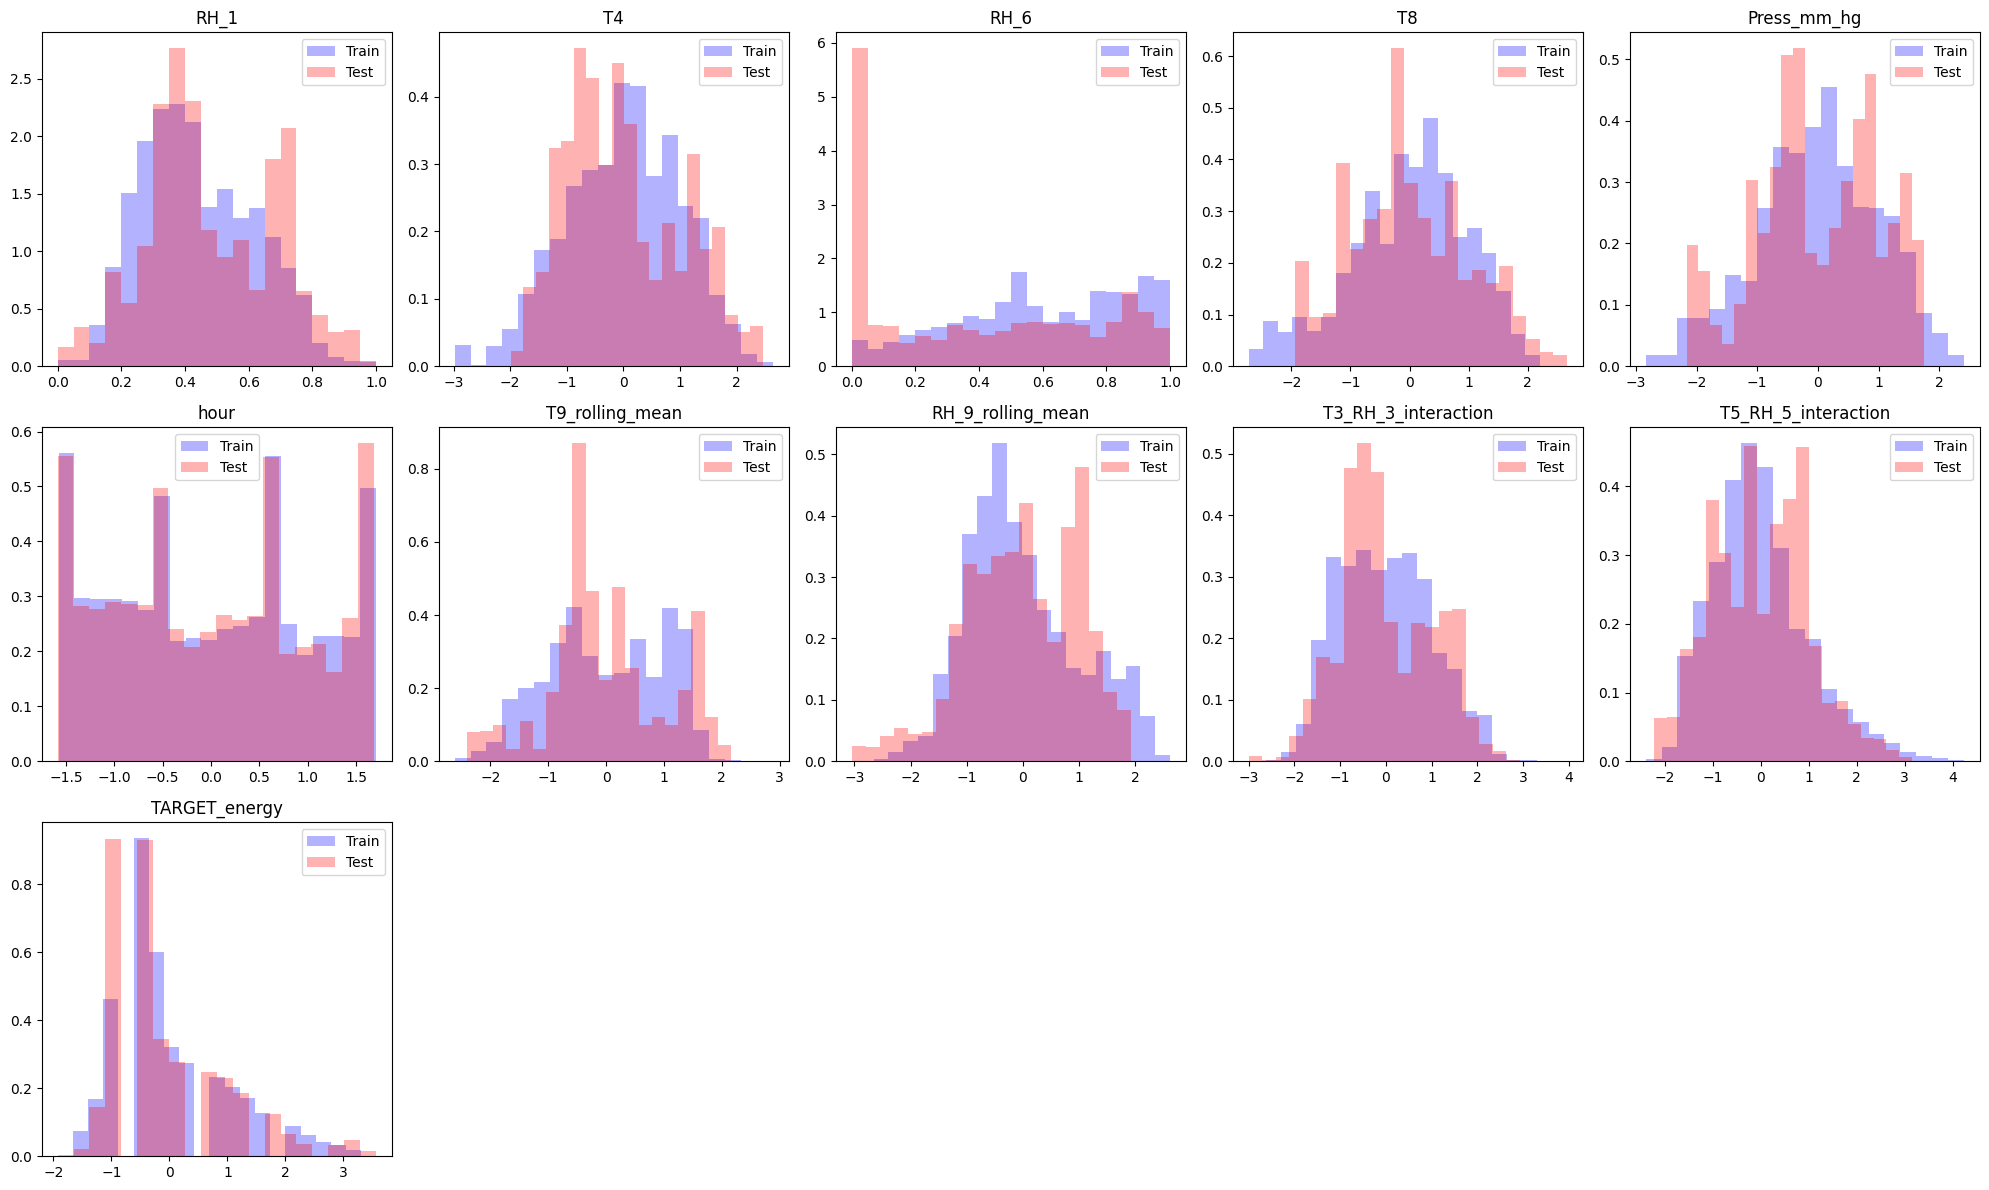

In [ ]:
import math
n = len(training_data.columns)
cols = 5
rows = math.ceil(n / cols)

plt.figure(figsize=(20, 4 * rows))
for i, col in enumerate(training_data.columns):
    plt.subplot(rows, cols, i + 1)
    plt.hist(training_data[col], alpha=0.3, color='b', density=True, bins=20, label='Train')
    plt.hist(testing_data[col], alpha=0.3, color='r', density=True, bins=20, label='Test')
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()

#### Plot of Energy Against Time

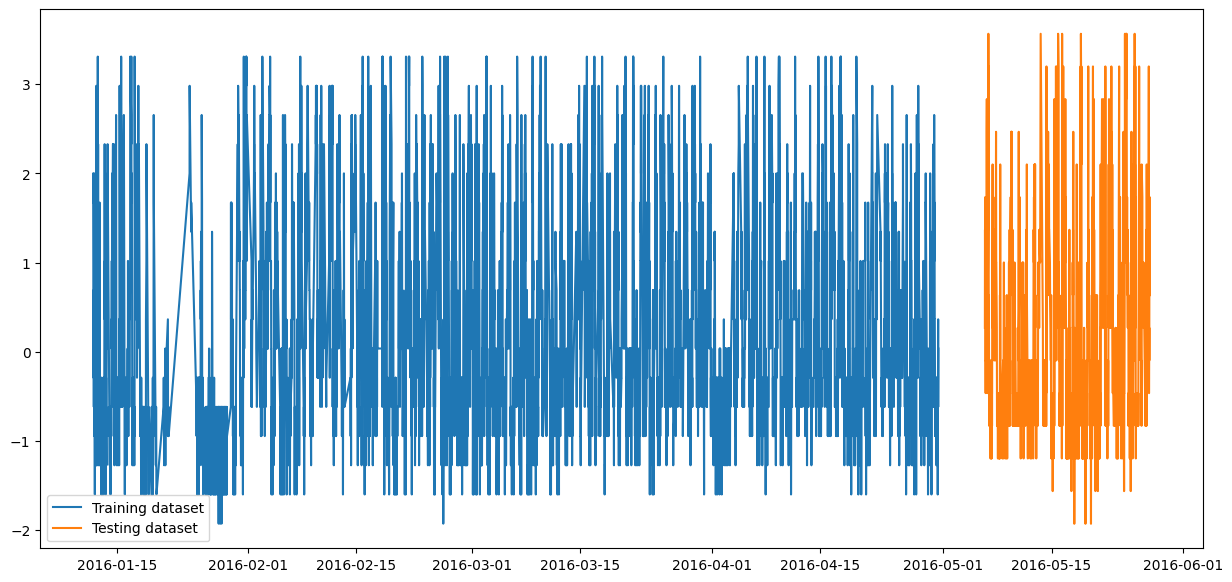

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(training_data.index,training_data['TARGET_energy'])
plt.plot(testing_data.index,testing_data['TARGET_energy'])
plt.legend(['Training dataset', 'Testing dataset'])
plt.show()

In [ ]:
print(f"Number of nulls in training dataset: {training_data.isnull().sum().sum()}")
print(f"Number of nulls in testing dataset:  {testing_data.isnull().sum().sum()}")

Number of nulls in training dataset: 0
Number of nulls in testing dataset:  0


#### Heatmap of whole dataset (display of correlation table)

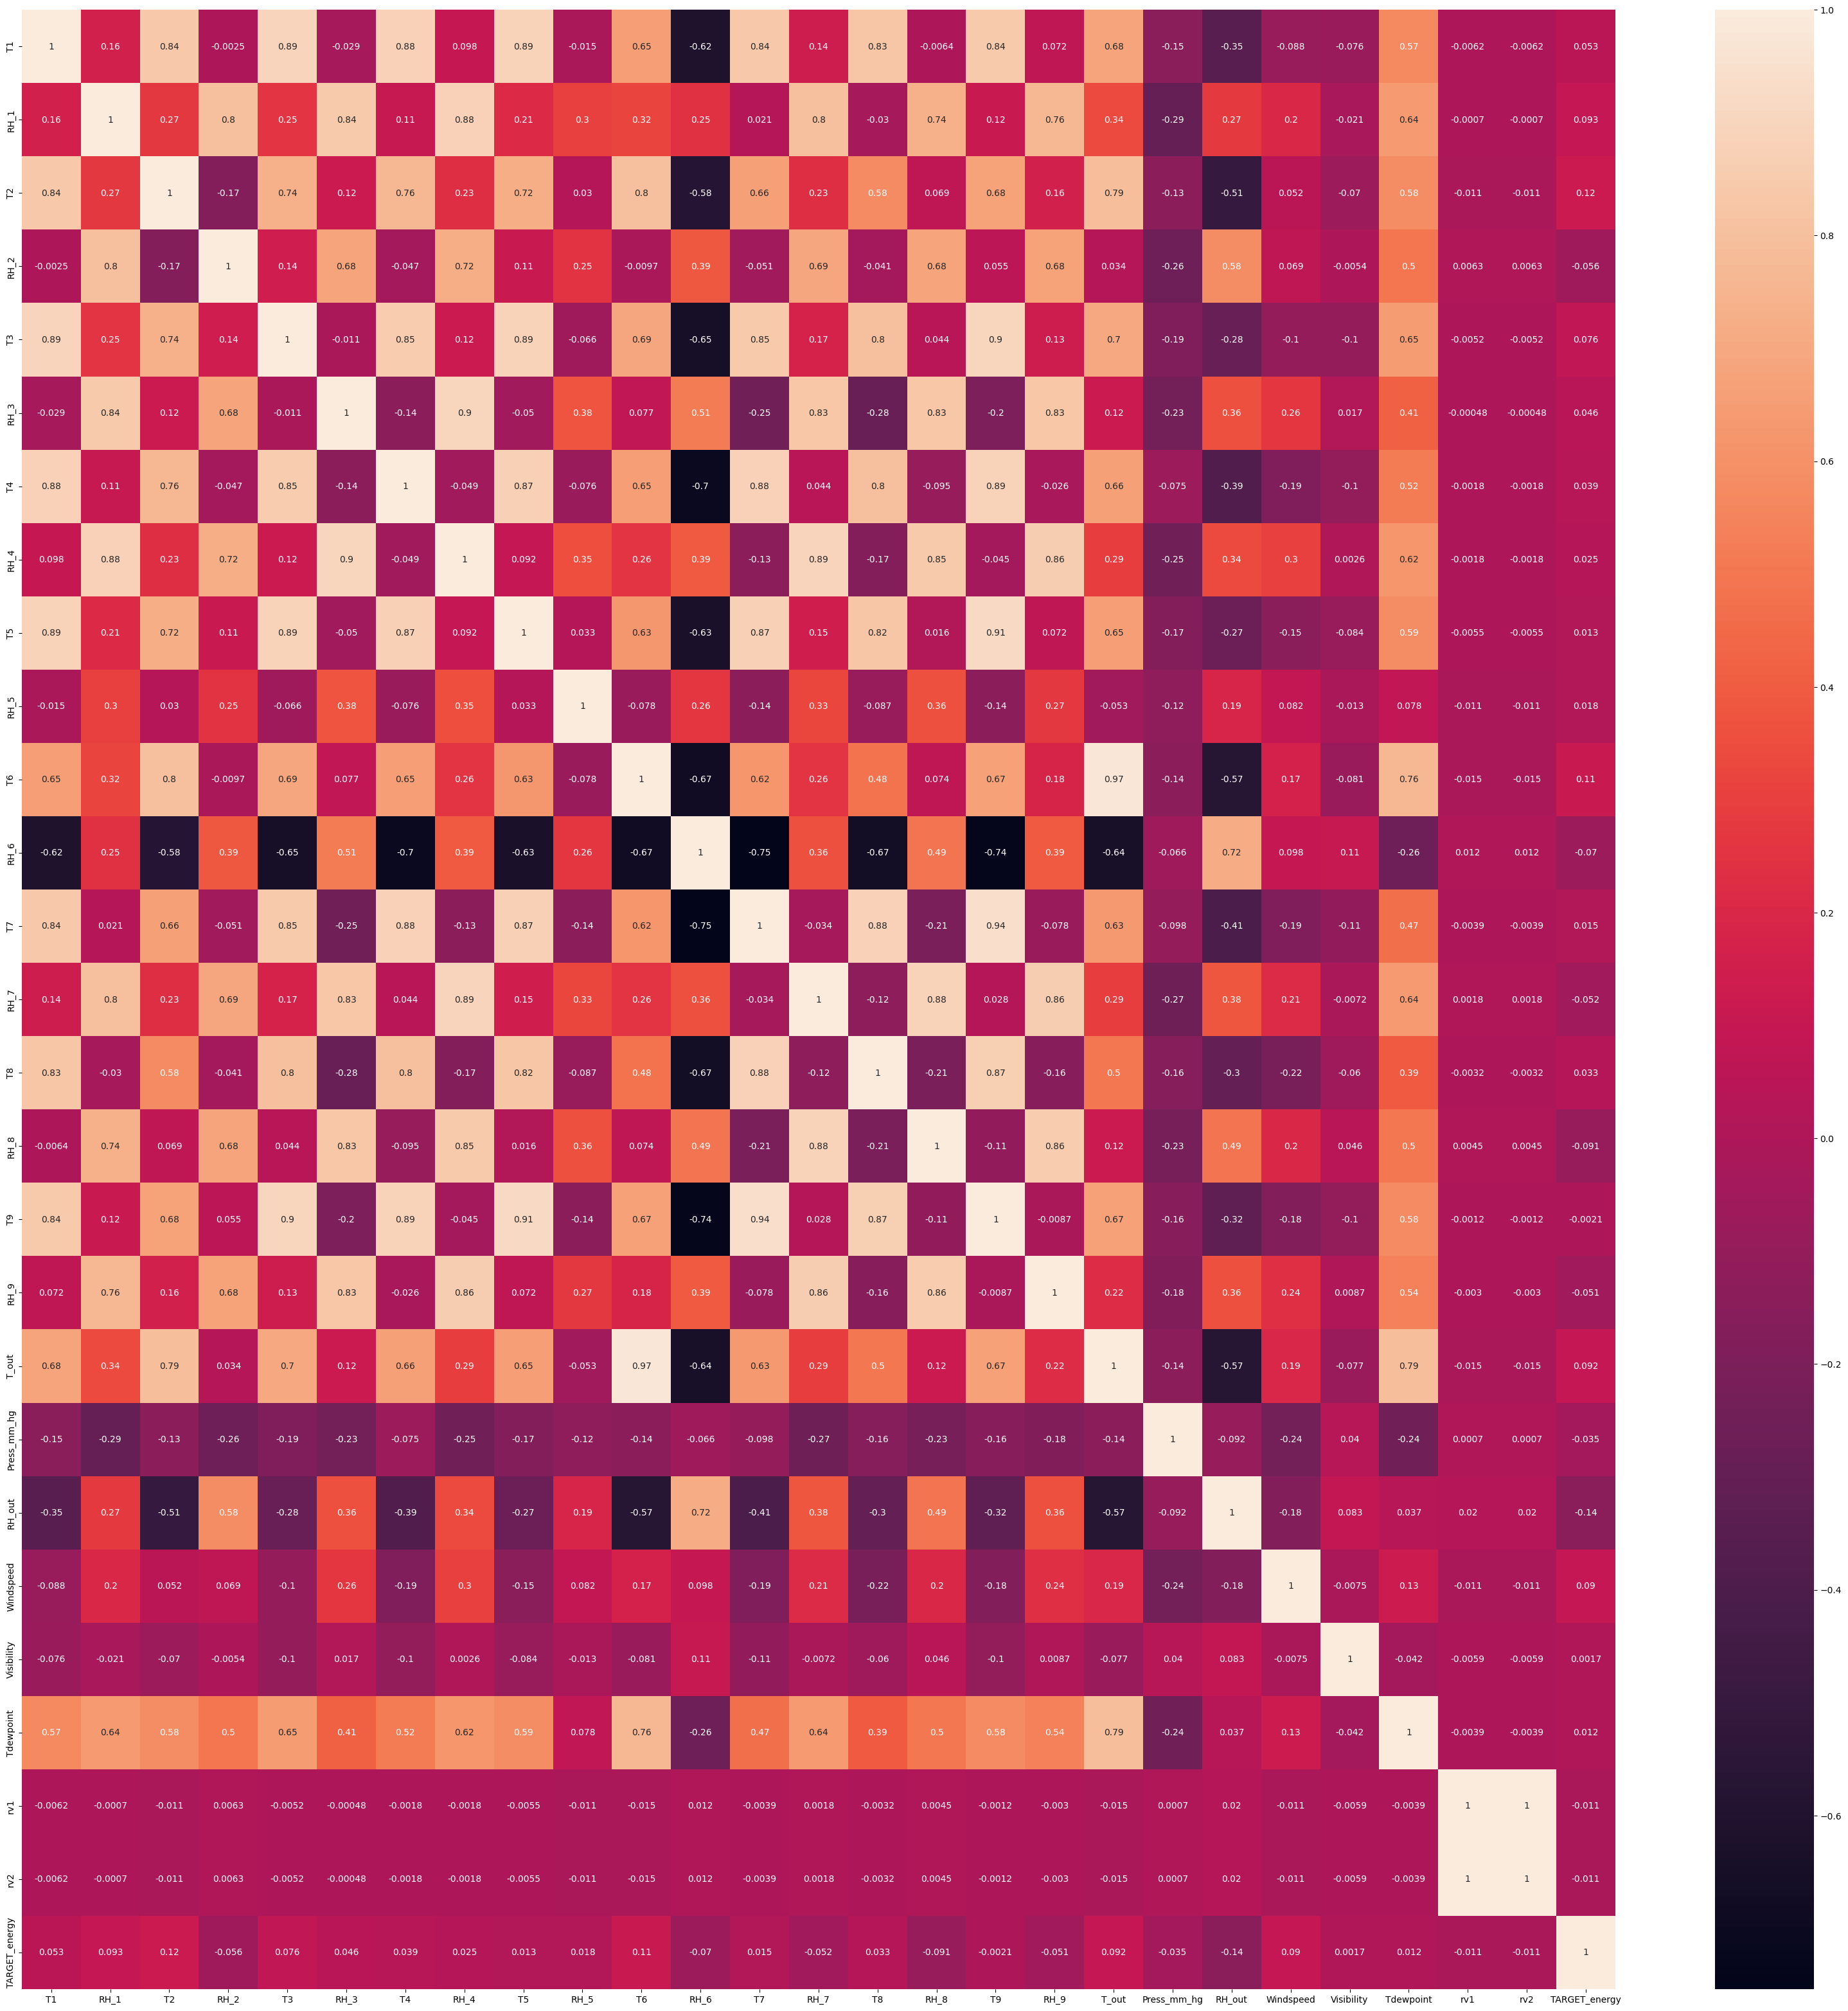

In [ ]:
plt.figure(figsize=(40,40))
correlation_table = df.corr()
sns.heatmap(correlation_table,annot=True)
plt.show()

In [ ]:
print(training_data.dtypes)
print(testing_data.dtypes)

RH_1                   float64
T4                     float64
RH_6                   float64
T8                     float64
Press_mm_hg            float64
hour                   float64
T9_rolling_mean        float64
RH_9_rolling_mean      float64
T3_RH_3_interaction    float64
T5_RH_5_interaction    float64
TARGET_energy          float64
dtype: object
RH_1                   float64
T4                     float64
RH_6                   float64
T8                     float64
Press_mm_hg            float64
hour                   float64
T9_rolling_mean        float64
RH_9_rolling_mean      float64
T3_RH_3_interaction    float64
T5_RH_5_interaction    float64
TARGET_energy          float64
dtype: object


In [ ]:
print(f"Target feature info (training set):\n{training_data['TARGET_energy'].describe()}\n")
print(f"Target feature info (testing set):\n{testing_data['TARGET_energy'].describe()}")

Target feature info (training set):
count    1.015100e+04
mean    -6.999731e-18
std      1.000049e+00
min     -1.926597e+00
25%     -6.177436e-01
50%     -2.905303e-01
75%      6.911096e-01
max      3.308816e+00
Name: TARGET_energy, dtype: float64

Target feature info (testing set):
count    2.410000e+03
mean    -5.306958e-17
std      1.000208e+00
min     -1.927976e+00
25%     -8.294446e-01
50%     -4.632674e-01
75%      6.352643e-01
max      3.564682e+00
Name: TARGET_energy, dtype: float64


# Part 2: Non Neural Algorithm

## Modelling using XGBoost

In [ ]:
training_set, validation_set = train_test_split(training_data, test_size=0.2, shuffle=False)

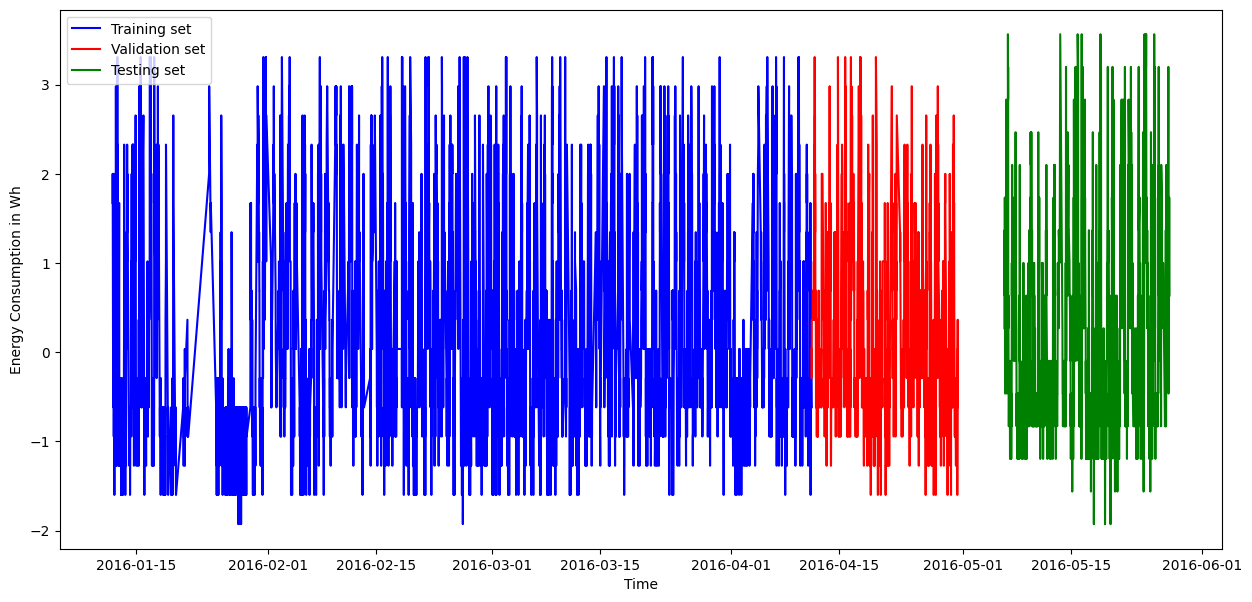

In [ ]:
plt.figure(figsize=(15, 7))

plt.plot(training_set.index, training_set['TARGET_energy'], label='Training Set', color='blue')
plt.plot(validation_set.index, validation_set['TARGET_energy'], label='Validation Set', color='red')
plt.plot(testing_data.index,testing_data['TARGET_energy'], color='green')
plt.xlabel('Time')
plt.ylabel("Energy Consumption in Wh")
plt.legend(["Training set","Validation set","Testing set"])
plt.show()

In [ ]:
! pip install xgboost
import xgboost as xgb

In [ ]:
X_train, y_train = training_set.drop(columns=['TARGET_energy']), training_set['TARGET_energy']
X_test, y_test = validation_set.drop(columns=['TARGET_energy']), validation_set['TARGET_energy']

In [ ]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
training_predictions = model.predict(X_train)
testing_predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error


mse_training = mean_squared_error(training_predictions, y_train)
rmse_training = math.sqrt(mse_training)

mse_testing = mean_squared_error(testing_predictions,y_test)
rmse_testing = math.sqrt(mse_testing)

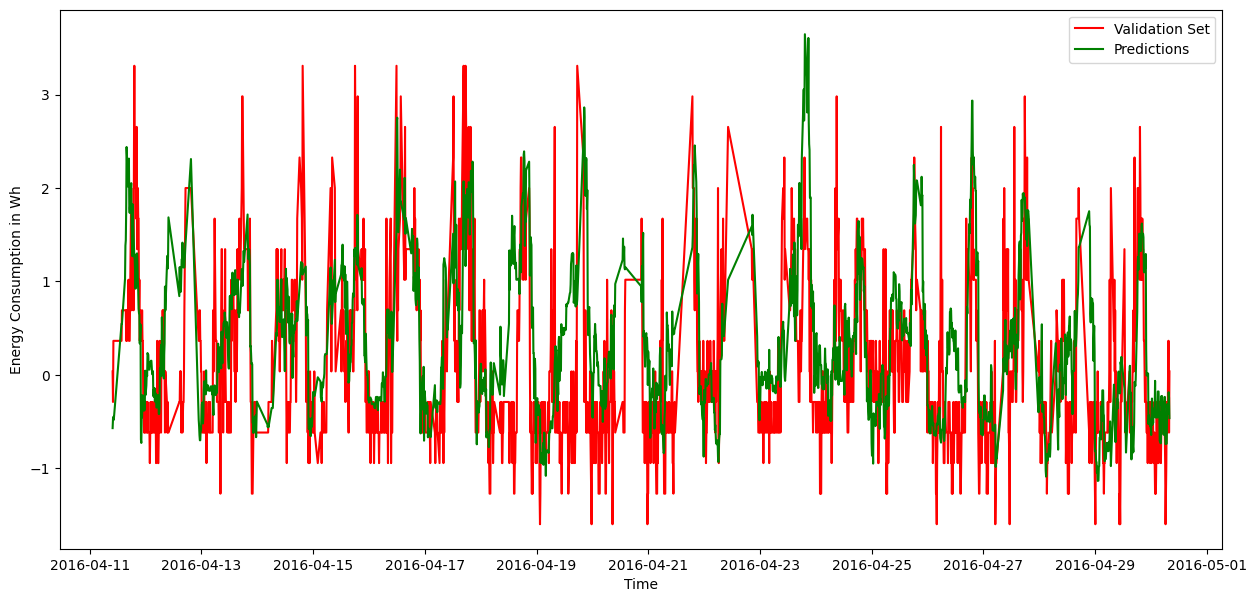

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(validation_set.index, validation_set['TARGET_energy'], label='Validation Set', color='red')
plt.plot(validation_set.index, testing_predictions, color='green', label='Predictions')
plt.xlabel('Time')
plt.ylabel("Energy Consumption in Wh")
plt.legend()
plt.show()

In [ ]:
print(f"RMSE for training (non - neural): {rmse_training}")
print(f"MSE for training (non - neural): {mse_training}\n")

print(f"RMSE for testing (non - neural): {rmse_testing}")
print(f"MSE for testing (non - neural): {mse_testing}")

RMSE for training (non - neural): 0.3103030206860328
MSE for training (non - neural): 0.09628796464687653

RMSE for testing (non - neural): 0.8385345463567027
MSE for testing (non - neural): 0.7031401854336411


### Part 2B: Refinements

Feature Engineering:

Feature Selection:

Hyperparameter Tuning:

Model Evaluation:

Model Training:

Model Evaluation: